# **Iris Flowers Types Deep Analysis and Classification using LR, DT, KNN, & SVM**



## **✅ Contact Me / My Profiles**

**<h2 align="center">Hi there, I'm Eng. Hassan Amr 👋</h2>**
<p align="center">
  <a href="mailto:hassan.amr.soliman@gmail.com" target="_blank">
    <img src="https://raw.githubusercontent.com/hassan-amr/Simple-Blog-Feed-App/master/images/gmail.png" width=50" height="38">
  </a>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
  <a href="https://linkedin.com/in/hassan-amr-684a851ba" target="_blank">
    <img src="https://raw.githubusercontent.com/hassan-amr/Simple-Blog-Feed-App/master/images/linkedin.png" width=45" height="45">
  </a>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
  <a href="https://github.com/hassan-amr" target="_blank">
    <img src="https://raw.githubusercontent.com/hassan-amr/Simple-Blog-Feed-App/master/images/github.png" width=50" height="50">
  </a>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
  <a href="https://www.hackerrank.com/HassanAmrSoliman" target="_blank">
    <img src="https://raw.githubusercontent.com/hassan-amr/Simple-Blog-Feed-App/master/images/HackerRank_logo.png" width=45" height="50">
  </a>
</p>


## **1. Why Iris Flowers Types classification is so important?**





*The genus Iris from the Iridaceae family consists of more than 262 recognized species. It is an ornamental and medicinal plant widely distributed in the Northern Hemisphere. Iris species convey a long history as valuable traditional drugs with a wide variety of applications in various cultures, having been recorded  since medieval times.*

*Currently,  Iris spp. still  find application in numerous fields,  including cosmetics,  pharmaceutics and  the  food industry.  Moreover, many  of their empirical uses have been validated by in vitro and in vivo studies, showing that Iris spp. ex-hibit potent antioxidant, anticancer, anti-inflammatory, hepatoprotective, neuroprotective and anti-microbial properties. Phytochemicals investigations have revealed that the plant extracts are rich in phenolic compounds, especially flavonoids and phenolic acids.*

*As such, they constitute a promising lead for seeking  new  drugs with high  susceptibilities  towards various health  issues, particularly oxidative-stress-related diseases such as  cancers,  neurodegenerative diseases, cardiovascular dis-eases, diabetes, etc.*

Reference: https://www.researchgate.net/publication/359120202_Exploring_the_Use_of_Iris_Species_Antioxidant_Properties_Phytochemistry_Medicinal_and_Industrial_Applications

<div align='center'><img src="https://raw.githubusercontent.com/hassan-amr/Iris-Flowers-Types-Deep-Analysis-and-Classification-using-LR-DT-KNN-SVM/main/NotebookImages/iris_flowers_types.png?token=GHSAT0AAAAAACNWL7EBWSXU5T4O7CO7TZHQZN44DIA" width="500"/></div>

**Our mission is to differentiate between 3 types of iris flowers (Setosa, Virginica, and Versicolor) by classifying an iris flower to one of the 3 classes according to its Sepal Length (cm), Sepal Width (cm), Petal Length (cm), and Petal Width (cm).**

<div align='center'><img src="https://raw.githubusercontent.com/hassan-amr/Iris-Flowers-Types-Deep-Analysis-and-Classification-using-LR-DT-KNN-SVM/main/NotebookImages/iris_flower_length_width.jpg?token=GHSAT0AAAAAACNWL7EAC6UTLW3OOVI2O3OKZN44ZLA" width="250"/></div>

## **2. Loading Dataset & Dataset Exploration**

### **2.1. Load the iris dataset from csv file and extract general info. about the dataset**

In [4]:
import pandas as pd

# Read iris dataset csv file and convert data to DataFrame
df = pd.read_csv("/content/sample_data/iris_dataset.csv")

# Print DataFrame info.
# entries count, columns names and datatypes, null values if exist, and memory usage
print ('\n➡️ DataFrame Info.\n')
print(df.info())

# Explore first 10 datapoints in the DataFrame
print ('\n➡️ DataFrame First 10 Rows\n')
print(df.head(10))

# Explore last 10 datapoints in the DataFrame
print ('\n➡️ DataFrame Last 10 Rows\n')
print(df.tail(10))

# Explore all the uniques value present in each column/feature
print ('\n➡️ Unique values in each column\n')
for column in df:
    print(column)
    print(df[column].unique())


➡️ DataFrame Info.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

➡️ DataFrame First 10 Rows

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  iris_setosa
1           4.9          3.0           1.4          0.2  iris_setosa
2           4.7          3.2           1.3          0.2  iris_setosa
3           4.6          3.1           1.5          0.2  iris_setosa
4           5.0          3.6           1.4          0.2  iris_setosa
5           5.4          3.9           1.7          0.4  iris_setosa
6    

**As obvious from the output**
*   The dataset contains 150 rows/entries and 5 columns/features (sepal_length, sepal_width, petal_length, petal_width, class).
*   There are 3 iris flower classes ('iris_setosa', 'iris_versicolor', and 'iris_virginica')
*   The 4 features values and datatype the for the lenght and width of the sepal and petal seem valid as they are all float64
*   No missing or null values


**Next is to check if the dataset is balanced or not**





In [5]:
df['class'].value_counts()

iris_setosa        50
iris_versicolor    50
iris_virginica     50
Name: class, dtype: int64

**The 3 classes have equal datapoints, so the dataset is balanced**

### **2.2. Explore the features importance & the relationship between them**

**Calculate the correlation between all the features to assess the strength and direction of the linear relationships between pairs of variables**

In [6]:
# Calculate correlation
corr = df.corr()
# Set correlation table style
corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


**From the correlation table above, it is obvious that**
*   The are strong linear relationships between (Sepal Length, Petal Length & Petal Width), (Petal Length, Sepal Length & Petal Width), and (Petal Width, Sepal Length & Petal Length)
*   As Sepal Length increases -> Petal Length increases & Petal Width increases
*   As Petal Length increases -> Sepal Length increases & Petal Width increases
*   As Petal Width increases -> Sepal Length increases & Petal Length increases




### **2.3. Visualize Dataset Features**

**Visualize and plot all the dataset features to highlight the data patterns and better understand how the data are scattered**

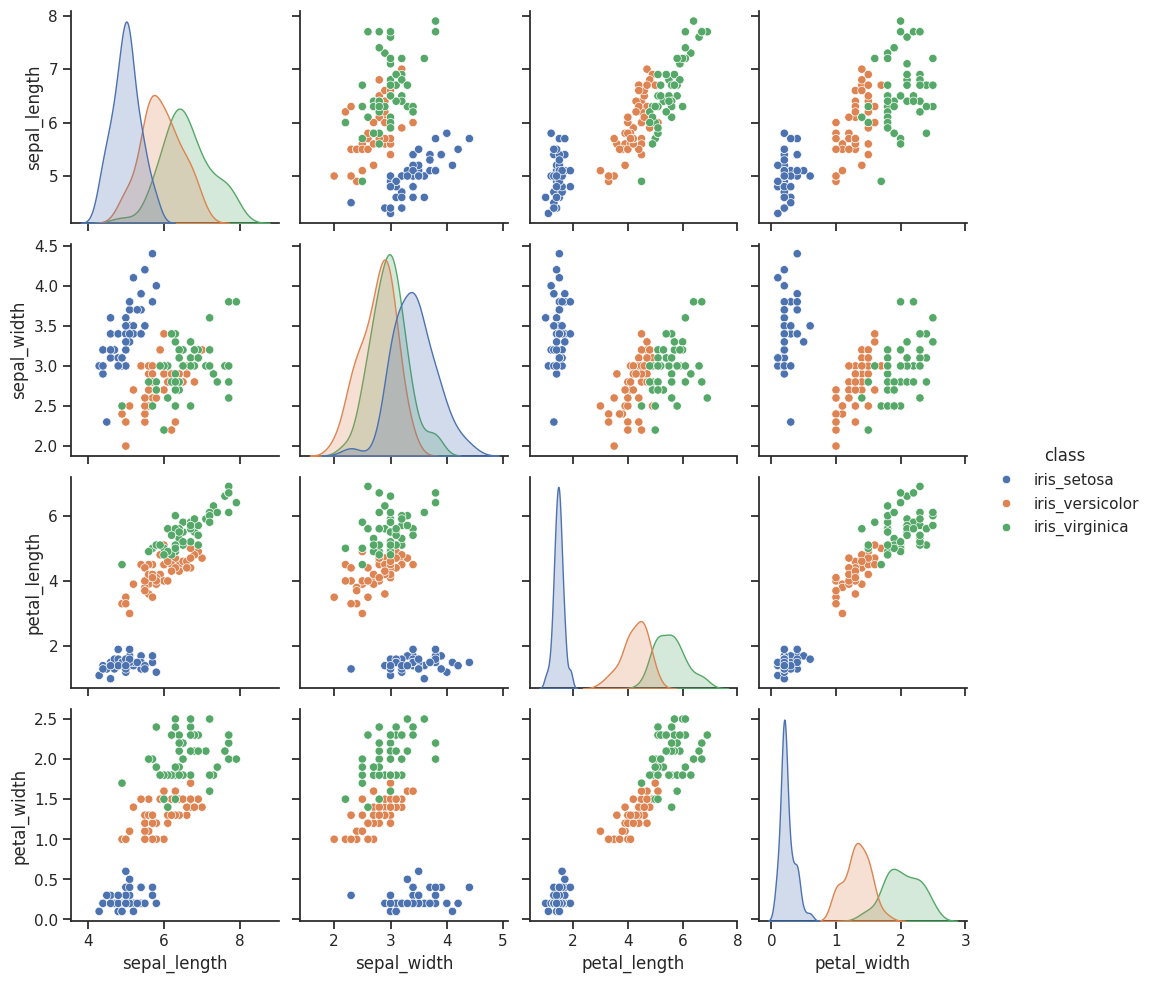

In [7]:
import seaborn as sns

# Set the figure/graph style
sns.set(style='ticks')
# Plot all the dataframe featres againist each other
sns.pairplot(df, hue="class")

**From the above graphs it is visible that**
*   The Sepal Length & Sepal Width are not good features for classifying the flower types as the 3 distributions are highly overlapping
*   The Petal Length & Petal Width are better features to classify the flower types as the distribution of Setosa is almost not overlapping with the other distributions and the distribution overlapping is small between Versicolor & Virginica



## **3. Dataset Preprocessing**

**During the dataset exploration**
*   No missing values or nulls found
*   No categorical feature values found

**So the next to do is**
*   Make sure no duplicates present
*   Make sure no outliers prensent

**I will use Z-Score method to check if outliers exist with threshold = 3 as 99.7% of the data points lie between +/- 3 standard deviation**



In [8]:
import numpy as np

# Find duplicate rows if exist
print ('\n➡️ Duplicate rows count\n')
print (df.duplicated().sum())

# Find outliers if exist
print ('\n➡️ Outliers Test\n')
numeric_cols = df.select_dtypes(include=[np.number]).columns
for column in numeric_cols:
  # Calculate mean and standard deviation for the column
  mean = np.mean(df[column])
  std = np.std(df[column])
  print(column, ' mean = ', mean)
  print(column, 'std. deviation = ', std)

  # If Z-Score > 3, then mark as outlier
  threshold = 3
  outliers = []
  for i in df[column]:
    z = (i-mean)/std
    if z > threshold:
        outliers.append(i)
        print('⚠️ outlier found in col:', column, ' = ', i)


➡️ Duplicate rows count

3

➡️ Outliers Test

sepal_length  mean =  5.843333333333334
sepal_length std. deviation =  0.8253012917851409
sepal_width  mean =  3.0540000000000003
sepal_width std. deviation =  0.4321465800705435
⚠️ outlier found in col: sepal_width  =  4.4
petal_length  mean =  3.758666666666666
petal_length std. deviation =  1.7585291834055212
petal_width  mean =  1.1986666666666668
petal_width std. deviation =  0.7606126185881716


**So our duplicates test and Z-Score tests yielded that**
*   There are 3 duplicate rows
*   There is 1 outlier

**The next step is to remove the duplicates and the outliers as they can have negative effects on the model accuracy**

In [9]:
# Drop duplicate rows
df = df.drop_duplicates()

# Drop outlier row
df = df[df.sepal_width != 4.4]

## **4. Training & Testing Preparation**

In [10]:
from sklearn.model_selection import train_test_split

# Features
X = df.drop('class', axis=1)
# Target Feature
y = df['class']

# Split the features and tagret feature to training and testing sets with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## **5. Initial Models Building & Evaluation**


**First we will build sample models and test them to find which model will perform the best on the dataset then enhance it and tune its hyper-paramters**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score

def print_evaluation_metrics(model_name, accuracy_train_set, accuracy_test_set, precision_test_set, confusion_matrix):
  print('Accuracy of', model_name, 'on train set: {:.2f}'.format(accuracy_train_set))
  print('Accuracy of', model_name, 'classifier on test set: {:.2f}'.format(accuracy_test_set))
  print('Precision of', model_name, 'classifier on test set: {:.2f}'.format(precision_test_set))
  print('Confusion Matrix:\n', confusion_matrix)

### **5.1. Logistic Regression Model**

<div align='center'><img src="https://raw.githubusercontent.com/hassan-amr/Iris-Flowers-Types-Deep-Analysis-and-Classification-using-LR-DT-KNN-SVM/main/NotebookImages/logistic_regression_model.png?token=GHSAT0AAAAAACNWL7EBGKBDE7EHYDDV6BCSZN44Q7Q" width="350"/></div>


In [12]:
# Instantiate the model (using the default parameters)
model = LogisticRegression(random_state=1)
# Fit the model with data
model.fit(X_train, y_train)

# Test Model & Print Results
y_pred = model.predict(X_test)
print_evaluation_metrics(
  'Logistic Regression',
  model.score(X_train, y_train),
  model.score(X_test, y_test),
  precision_score(y_test, y_pred, average='micro'),
  confusion_matrix(y_test, y_pred)
)

Accuracy of Logistic Regression on train set: 0.97
Accuracy of Logistic Regression classifier on test set: 0.93
Precision of Logistic Regression classifier on test set: 0.93
Confusion Matrix:
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  1  9]]


### **5.2. Decision Tree Model**

<div align='center'><img src="https://raw.githubusercontent.com/hassan-amr/Iris-Flowers-Types-Deep-Analysis-and-Classification-using-LR-DT-KNN-SVM/main/NotebookImages/decision_tree_model.png?token=GHSAT0AAAAAACNWL7EAD5SBOUNVAY5ZZVSEZN44QBA" width="350"/></div>

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model (using the default parameters)
model = DecisionTreeClassifier(random_state=1)

# Fit the model with data
model.fit(X_train,y_train)

# Test Model & Print Results
y_pred = model.predict(X_test)
print_evaluation_metrics(
  'Decision Tree',
  model.score(X_train, y_train),
  model.score(X_test, y_test),
  precision_score(y_test, y_pred, average='micro'),
  confusion_matrix(y_test, y_pred)
)

Accuracy of Decision Tree on train set: 1.00
Accuracy of Decision Tree classifier on test set: 0.90
Precision of Decision Tree classifier on test set: 0.90
Confusion Matrix:
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  2  8]]


### **5.3. K-Nearest Neighbour (KNN)**

<div align='center'><img src="https://raw.githubusercontent.com/hassan-amr/Iris-Flowers-Types-Deep-Analysis-and-Classification-using-LR-DT-KNN-SVM/main/NotebookImages/k_nearest_neighbours_model.png?token=GHSAT0AAAAAACNWL7EARJKXJJTORTWWJREAZN44RSA" width="350"/></div>

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model (using the default parameters and 3 neigbours as there are 3 classes)
model = KNeighborsClassifier(n_neighbors=3)

# Fit the model with data
model.fit(X_train, y_train)

# Test Model & Print Results
y_pred = model.predict(X_test)
print_evaluation_metrics(
  'K-Nearest Neighbours',
  model.score(X_train, y_train),
  model.score(X_test, y_test),
  precision_score(y_test, y_pred, average='micro'),
  confusion_matrix(y_test, y_pred)
)

Accuracy of K-Nearest Neighbours on train set: 0.97
Accuracy of K-Nearest Neighbours classifier on test set: 0.90
Precision of K-Nearest Neighbours classifier on test set: 0.90
Confusion Matrix:
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  2  8]]


### **5.4. Support Vector Machine (SVM)**

<div align='center'><img src="https://raw.githubusercontent.com/hassan-amr/Iris-Flowers-Types-Deep-Analysis-and-Classification-using-LR-DT-KNN-SVM/main/NotebookImages/support_vector_machine_model.png?token=GHSAT0AAAAAACNWL7EBGXZSZTG2LWMSSLGMZN44SFQ" width="350"/></div>

In [15]:
from sklearn import svm

# Instantiate the model (using the default parameters and Linear Kernel)
model = svm.SVC(kernel='linear', random_state=1)

# Fit the model with data
model.fit(X_train, y_train)

# Test Model & Print Results
y_pred = model.predict(X_test)
print_evaluation_metrics(
  'Support Vector Machine',
  model.score(X_train, y_train),
  model.score(X_test, y_test),
  precision_score(y_test, y_pred, average='micro'),
  confusion_matrix(y_test, y_pred)
)

Accuracy of Support Vector Machine on train set: 0.97
Accuracy of Support Vector Machine classifier on test set: 0.97
Precision of Support Vector Machine classifier on test set: 0.97
Confusion Matrix:
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]


## **6. Model Hyper-Parameter Tuning**

**From the results of the Initial Models Building**

N | Model  | Accuracy on Train Set | Accuracy on Test Set | Precision
-------------------|-------------------|------------------|------------------|------------------
1 | Logistic Regression | 0.97 | 0.93 | 0.93
2 | Decision Tree | 1.00 | 0.90 | 0.90
3 | K-Nearest Neighbour (KNN) | 1.00 | 0.90 | 0.90
4 | Support Vector Machine (SVM) | 0.97 | 0.97 | 0.97

It is obvious that the Decision Tree and K-Nearest Neighbours got the same results and got 100% accuracy when tested with train set but did't perform well using the test set relative to the Support Vector Machine that got 97% accuracy on both the the train and test sets.

Also SVM is better at this case when compared to the Logistic Regression model considering the accuracy on test set and precision. So we will enhance the SVM model through hyperparameter tuning to aim for higher accuracy.

**I will use the GridSearchCV Method to help automate the hyperparameter tuning process and find the best model faster**

**Search through the parameters:**
*   **C (Regularization):** to decide in SVM optimization how much error is bearable
*   **gamma:** to determine how far points influence the calculations of the line of separation
*   **kernel**: to determine the transformations to the higher n-spaces

In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameters ranges
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# Fit the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.304 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.304 total time=   0.0s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.917 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=pol

From the output and results, the best parameters for the SVM according to the above grid search, are **C=0.1, gamma=0.1, kernel='poly'**


**So build the model again the best parameters and test it**

In [17]:
model = svm.SVC(C=0.1, gamma=0.1, kernel='poly', random_state=1)

# Fit the model with data
model.fit(X_train, y_train)

# Test Model & Print Results
y_pred = model.predict(X_test)
print_evaluation_metrics(
  'Support Vector Machine',
  model.score(X_train, y_train),
  model.score(X_test, y_test),
  precision_score(y_test, y_pred, average='micro'),
  confusion_matrix(y_test, y_pred)
)

Accuracy of Support Vector Machine on train set: 0.97
Accuracy of Support Vector Machine classifier on test set: 0.97
Precision of Support Vector Machine classifier on test set: 0.97
Confusion Matrix:
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]


**Afer applying the best grid seach best parameters, the model accuracy remain the same as before the hyperparamter tuning**

## **7. Conclusion & Future Work**

For classifying the Iris flowers types according to their Sepals and Petals lengths and widths, following the above steps and approaches, the best model in terms of accuracy on both training set (97%) and test set (97%) as well as the precision score (97%) is the Support Vector Machine (SVM) with parameters C=0.1, gamma=0.1, kernel='poly', random_state=1.

Another Machine Learning Development Life Cycle (MLDC) will be made using another approaches for cleaning dataset, processing dataset, tuning hyperparameters, choosing hyperparamters to tune or choosing another models in order to achieve better performance, better accuracy, and less computational resources.